<a href="https://colab.research.google.com/github/PeluffoS/Im-gen-Panor-mica/blob/main/VISION_ARTIFICIAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imágen Panorámica**

Santiago Peluffo,Luna Gallo.

Universidad Tecnológica de Bolívar


Seleccione un filtro:
1. Filtro de Bordes
2. Filtro de Desenfoque
3. Salir
Ingrese el número del filtro que desea aplicar: 2


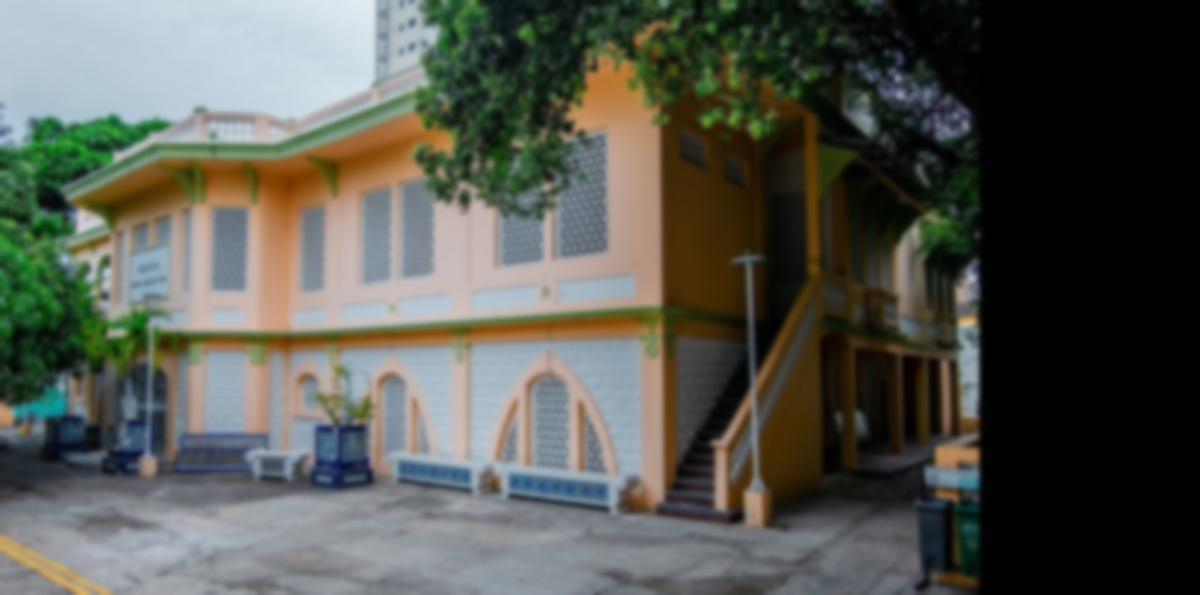

Seleccione un filtro:
1. Filtro de Bordes
2. Filtro de Desenfoque
3. Salir
Ingrese el número del filtro que desea aplicar: 1


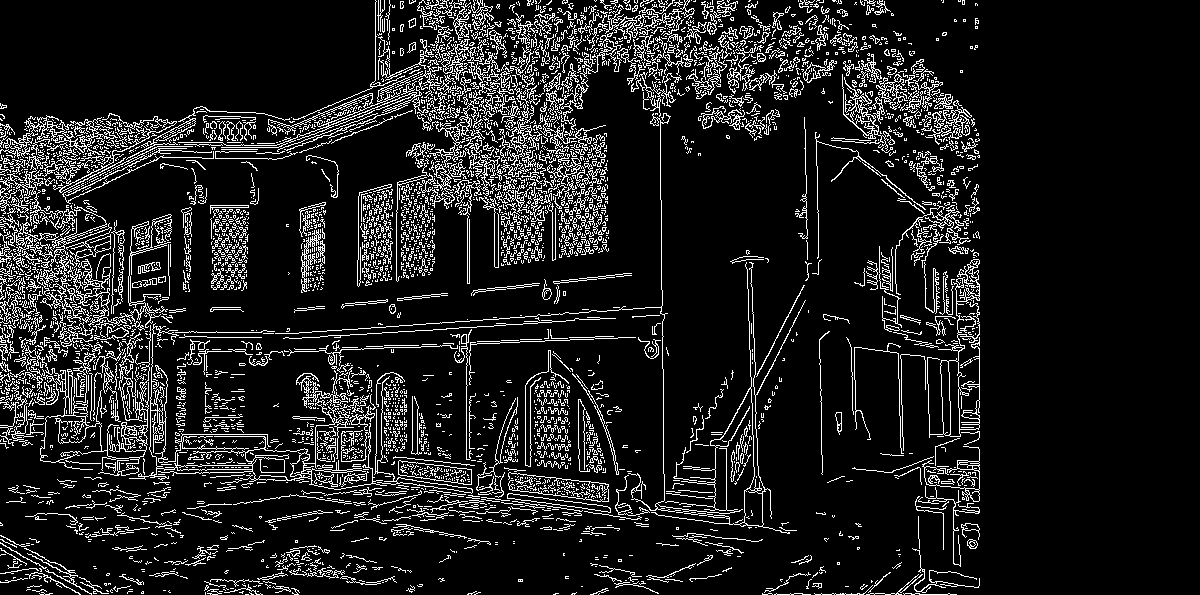

Seleccione un filtro:
1. Filtro de Bordes
2. Filtro de Desenfoque
3. Salir
Ingrese el número del filtro que desea aplicar: 3
Saliendo del programa...


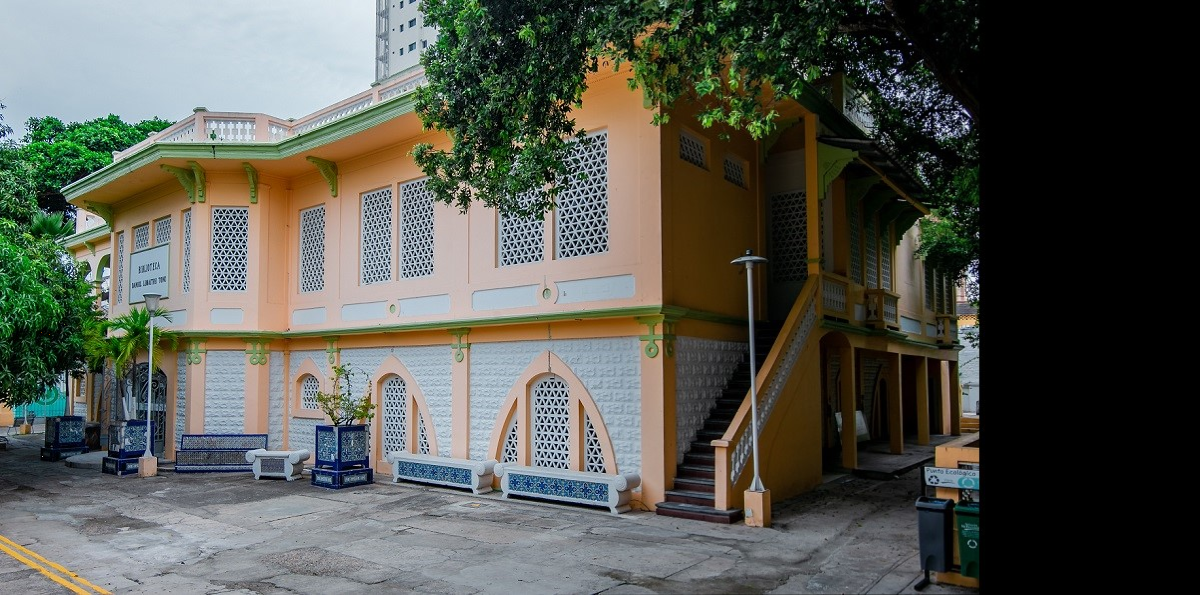

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def cargar_imagenes(ruta1, ruta2):
    img1 = cv2.imread(ruta1)
    img2 = cv2.imread(ruta2)
    return img1, img2

def normalizar_intensidad(img1, img2):
    # Convertir imágenes a escala de grises
    img1_gris = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2_gris = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Normalizar la intensidad de las imágenes
    img1_norm = cv2.normalize(img1_gris, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    img2_norm = cv2.normalize(img2_gris, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    return img1_norm, img2_norm

def encontrar_puntos_clave_y_emparejar(img1, img2):
    # Inicializar el detector ORB
    orb = cv2.ORB_create()

    # Encontrar puntos clave y descriptores con ORB
    puntos_clave1, descriptores1 = orb.detectAndCompute(img1, None)
    puntos_clave2, descriptores2 = orb.detectAndCompute(img2, None)

    # Emparejamiento de características utilizando BFMatcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(descriptores1, descriptores2)
    matches = sorted(matches, key=lambda x: x.distance)

    # Seleccionar los mejores matches
    buenos_matches = matches[:50]  # Puedes ajustar este valor

    # Extraer coordenadas de los puntos clave emparejados
    puntos1 = np.float32([puntos_clave1[m.queryIdx].pt for m in buenos_matches]).reshape(-1, 1, 2)
    puntos2 = np.float32([puntos_clave2[m.trainIdx].pt for m in buenos_matches]).reshape(-1, 1, 2)

    return puntos1, puntos2

def crear_imagen_panoramica_rectangular(img1, img2, puntos1, puntos2):
    # Calcular la matriz de homografía
    matriz, _ = cv2.findHomography(puntos2, puntos1, cv2.RANSAC)

    # Aplicar la transformación de perspectiva a la segunda imagen
    img2_transformada = cv2.warpPerspective(img2, matriz, (img1.shape[1] + img2.shape[1], img2.shape[0]))

    # Combinar las dos imágenes rellenando los espacios vacíos con datos de la imagen
    img2_transformada[:img1.shape[0], :img1.shape[1]] = img1

    # Rellenar los espacios vacíos con datos de la segunda imagen
    for i in range(img2_transformada.shape[0]):
        for j in range(img2_transformada.shape[1]):
            if i < img2.shape[0] and j < img2.shape[1]:
                if np.array_equal(img2_transformada[i, j], [0, 0, 0]):  # Si el píxel es negro (espacio vacío)
                    img2_transformada[i, j] = img2[i, j]

    return img2_transformada
def menu_filtros(imagen_panoramica):
    while True:
        print("Seleccione un filtro:")
        print("1. Filtro de Bordes")
        print("2. Filtro de Desenfoque")
        print("3. Salir")

        opcion = input("Ingrese el número del filtro que desea aplicar: ")

        if opcion == '1':
            imagen_filtros = aplicar_filtro_bordes(imagen_panoramica)
            cv2_imshow(imagen_filtros)
        elif opcion == '2':
            imagen_filtros = aplicar_filtro_desenfoque(imagen_panoramica)
            cv2_imshow(imagen_filtros)
        elif opcion == '3':
            print("Saliendo del programa...")
            break
        else:
            print("Opción no válida. Intente nuevamente.")

def aplicar_filtro_bordes(imagen):
    imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    bordes = cv2.Canny(imagen_gris, 100, 200)
    imagen_con_bordes = cv2.cvtColor(bordes, cv2.COLOR_GRAY2BGR)
    return imagen_con_bordes

def aplicar_filtro_desenfoque(imagen):
    imagen_desenfocada = cv2.GaussianBlur(imagen, (15, 15), 0)
    return imagen_desenfocada


    # Rutas de las imágenes a cargar
    ruta_imagen1 = 'UTBB1.jpeg'  # Ruta de la primera imagen
    ruta_imagen2 = 'UTBB2.jpeg'  # Ruta de la segunda imagen

    # Cargar las imágenes
    imagen1, imagen2 = cargar_imagenes(ruta_imagen1, ruta_imagen2)

    # Normalizar la intensidad de las imágenes
    imagen1_norm, imagen2_norm = normalizar_intensidad(imagen1, imagen2)

    # Encontrar puntos clave y emparejar características
    puntos_img1, puntos_img2 = encontrar_puntos_clave_y_emparejar(imagen1_norm, imagen2_norm)

   # Crear la imagen panorámica rectangular
    imagen_panoramica_rectangular = crear_imagen_panoramica_rectangular(imagen1, imagen2, puntos_img1, puntos_img2)
  # Mostrar menú de filtros
    menu_filtros(imagen_panoramica_rectangular)
    # Mostrar la imagen panorámica resultante
    cv2_imshow(imagen_panoramica_rectangular)

    # Guardar la imagen panorámica rectangular
    cv2.imwrite('imagen_panoramica_rectangular.jpeg', imagen_panoramica_rectangular)


In [ ]:
!jupyter nbconvert --to html /content/VISION_ARTIFICIAL.ipynb
